In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings, gc
warnings.filterwarnings('ignore')

In [2]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 300)
pd.set_option('display.width', 1000)

In [3]:
data = pd.read_csv('anonymized_costs.csv')

In [4]:
data.head(5)

,InvoiceSectionName,Date,MeterCategory,CostInBillingCurrency,MeterSubCategory,MeterName,SubscriptionName,ResourceGroup,ConsumedService,ResourceLocation,ResourceName
0,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/31/2022,Azure App Service,0.000000e+00,Free Plan,F1 App,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,8e04551db18efa5f0d61d169fc2abbc0a0fe47b337d340...,microsoft.web,westeurope,eb7b2b2291b962a3591cb5284020ee75b4c02937fed01c...
1,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/31/2022,Load Balancer,1.859983e-02,Standard,Standard Included LB Rules and Outbound Rules,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,05a92ef059d22b7847bf97a414cbd9b773f230a341f926...,Microsoft.MachineLearningServices,westeurope,55f17ee5c0235396a7acc69e7fc30d917319e3e053d08e...
2,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/31/2022,Storage,4.256956e-06,Tables,GRS Data Stored,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,334f28a0945bbab90ebf4a794cac86f5cfe3aacdc42cd2...,Microsoft.Storage,northeurope,b92f8ef6e1ac3ee7ca538e4b03926bbba53e01f1ce6088...
3,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/31/2022,Load Balancer,1.859983e-02,Standard,Standard Included LB Rules and Outbound Rules,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,05a92ef059d22b7847bf97a414cbd9b773f230a341f926...,Microsoft.MachineLearningServices,westeurope,55f17ee5c0235396a7acc69e7fc30d917319e3e053d08e...
4,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/31/2022,Storage,1.431193e-02,Standard SSD Managed Disks,E2 Disks,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,43c17db9ed1b2f8fb2b00a32c6223f6e6b1e4b9b92b5c3...,Microsoft.Compute,northeurope,c97e6c1b0d7cd5a7a56903385811b0a621aa0873089ab8...
5,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/30/2022,Storage,1.431193e-02,Standard SSD Managed Disks,E2 Disks,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,43c17db9ed1b2f8fb2b00a32c6223f6e6b1e4b9b92b5c3...,Microsoft.Compute,northeurope,8449260b1e8c5770be7d1cb67051f3eb9e5bed213da497...
6,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/30/2022,Bandwidth,5.223721e-09,Inter-Region,Intra Continent Data Transfer Out,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,05a92ef059d22b7847bf97a414cbd9b773f230a341f926...,Microsoft.MachineLearningServices,westeurope,55f17ee5c0235396a7acc69e7fc30d917319e3e053d08e...
7,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/30/2022,Storage,2.162486e-02,Premium SSD Managed Disks,P10 LRS Disk,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,05a92ef059d22b7847bf97a414cbd9b773f230a341f926...,Microsoft.MachineLearningServices,westeurope,55f17ee5c0235396a7acc69e7fc30d917319e3e053d08e...
8,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/29/2022,Storage,2.876663e-06,Tiered Block Blob,All Other Operations,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,660e1e0f19cc2d0dc3c1ad2563ef8005036d06912246ad...,Microsoft.Storage,westeurope,e7ac6c8bd9dc6cf1154b426ef9d22317ab49da974b877a...
9,bc05844fb9454a82a5380ad11fceccc59227e495d31ab1...,12/28/2022,Storage,1.386927e-01,Premium SSD Managed Disks,P4 LRS Disk,95e7dd23f5eed773783fc94e66ed6198d77b9b7c41c51c...,e8145a7f8a5d4e920ad007d31871b8e834a8a4a4d7349a...,Microsoft.Compute,westeurope,a0b306a29ac9f88fb46b328f1c873ea83dcc41936bb2b5...


In [5]:
data.shape

(93605, 11)

In [6]:
# drop anonyms columns as we dont need tham in our analysis
data.drop(columns = ['InvoiceSectionName',"SubscriptionName","ResourceGroup","ResourceName",],inplace = True)



In [7]:
data.head(5)

,Date,MeterCategory,CostInBillingCurrency,MeterSubCategory,MeterName,ConsumedService,ResourceLocation
0,12/31/2022,Azure App Service,0.000000e+00,Free Plan,F1 App,microsoft.web,westeurope
1,12/31/2022,Load Balancer,1.859983e-02,Standard,Standard Included LB Rules and Outbound Rules,Microsoft.MachineLearningServices,westeurope
2,12/31/2022,Storage,4.256956e-06,Tables,GRS Data Stored,Microsoft.Storage,northeurope
3,12/31/2022,Load Balancer,1.859983e-02,Standard,Standard Included LB Rules and Outbound Rules,Microsoft.MachineLearningServices,westeurope
4,12/31/2022,Storage,1.431193e-02,Standard SSD Managed Disks,E2 Disks,Microsoft.Compute,northeurope
5,12/30/2022,Storage,1.431193e-02,Standard SSD Managed Disks,E2 Disks,Microsoft.Compute,northeurope
6,12/30/2022,Bandwidth,5.223721e-09,Inter-Region,Intra Continent Data Transfer Out,Microsoft.MachineLearningServices,westeurope
7,12/30/2022,Storage,2.162486e-02,Premium SSD Managed Disks,P10 LRS Disk,Microsoft.MachineLearningServices,westeurope
8,12/29/2022,Storage,2.876663e-06,Tiered Block Blob,All Other Operations,Microsoft.Storage,westeurope
9,12/28/2022,Storage,1.386927e-01,Premium SSD Managed Disks,P4 LRS Disk,Microsoft.Compute,westeurope


In [8]:
data.shape

(93605, 7)

In [9]:
data.isna().sum()

Date                     0
MeterCategory            0
CostInBillingCurrency    0
MeterSubCategory         0
MeterName                0
ConsumedService          0
ResourceLocation         0
dtype: int64

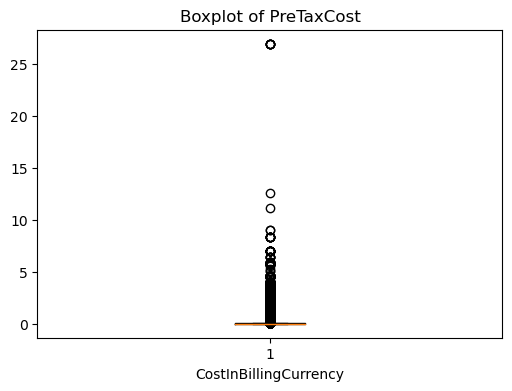

In [10]:
plt.figure(figsize=(6, 4))
plt.boxplot(data['CostInBillingCurrency'] )
plt.xlabel('CostInBillingCurrency')
plt.title('Boxplot of PreTaxCost')
plt.show()

In [11]:
data['MeterCategory'].value_counts()

Storage                                           41238
Bandwidth                                         13467
Virtual Network                                    8996
Advanced Threat Protection                         8782
Load Balancer                                      5721
Virtual Machines                                   3844
Azure Front Door Service                           2528
Azure App Service                                  1226
Logic Apps                                          796
Azure DNS                                           658
Container Registry                                  566
Service Bus                                         536
Backup                                              534
Azure Database for MySQL                            513
Log Analytics                                       449
SQL Database                                        396
Advanced Data Security                              359
Security Center                                 

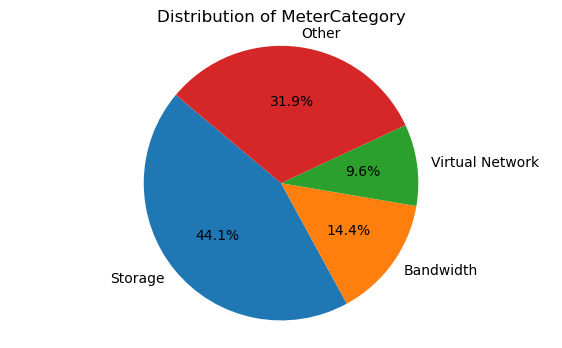

In [12]:
value_counts = data['MeterCategory'].value_counts()

# Select the top 3 most frequent Metercategory and group the rest as "Other"
top_values = value_counts.head(3)
other_count = value_counts[3:].sum()

# Combine the top 3 values and "Other" into a new DataFrame
plot_data = top_values.append(pd.Series({'Other': other_count}))


plt.figure(figsize=(7, 4))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of MeterCategory')
plt.show()

In [13]:
data.head(5)

,Date,MeterCategory,CostInBillingCurrency,MeterSubCategory,MeterName,ConsumedService,ResourceLocation
0,12/31/2022,Azure App Service,0.000000e+00,Free Plan,F1 App,microsoft.web,westeurope
1,12/31/2022,Load Balancer,1.859983e-02,Standard,Standard Included LB Rules and Outbound Rules,Microsoft.MachineLearningServices,westeurope
2,12/31/2022,Storage,4.256956e-06,Tables,GRS Data Stored,Microsoft.Storage,northeurope
3,12/31/2022,Load Balancer,1.859983e-02,Standard,Standard Included LB Rules and Outbound Rules,Microsoft.MachineLearningServices,westeurope
4,12/31/2022,Storage,1.431193e-02,Standard SSD Managed Disks,E2 Disks,Microsoft.Compute,northeurope
5,12/30/2022,Storage,1.431193e-02,Standard SSD Managed Disks,E2 Disks,Microsoft.Compute,northeurope
6,12/30/2022,Bandwidth,5.223721e-09,Inter-Region,Intra Continent Data Transfer Out,Microsoft.MachineLearningServices,westeurope
7,12/30/2022,Storage,2.162486e-02,Premium SSD Managed Disks,P10 LRS Disk,Microsoft.MachineLearningServices,westeurope
8,12/29/2022,Storage,2.876663e-06,Tiered Block Blob,All Other Operations,Microsoft.Storage,westeurope
9,12/28/2022,Storage,1.386927e-01,Premium SSD Managed Disks,P4 LRS Disk,Microsoft.Compute,westeurope


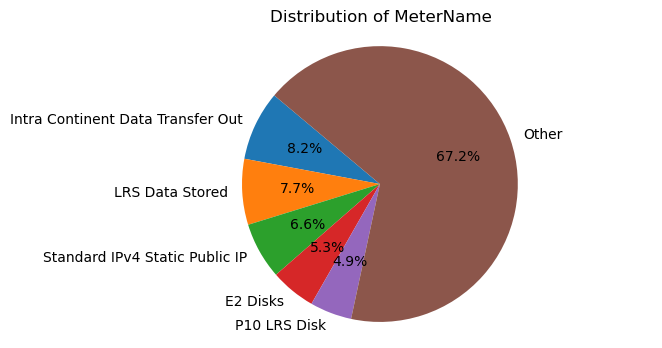

In [14]:
value_counts = data['MeterName'].value_counts()

# Select the top 5 most frequent Metername and group the rest as "Other"
top_values = value_counts.head(5)
other_count = value_counts[5:].sum()

# Combine the top 5 values and "Other" into a new DataFrame
plot_data = top_values.append(pd.Series({'Other': other_count}))


plt.figure(figsize=(7, 4))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of MeterName')
plt.show()

In [15]:
data['MeterName'].value_counts()

Intra Continent Data Transfer Out                       7650
LRS Data Stored                                         7217
Standard IPv4 Static Public IP                          6224
E2 Disks                                                4976
P10 LRS Disk                                            4596
Batch Write Operations                                  4414
Standard Trial Transactions                             4271
Standard Node                                           3896
Standard Included LB Rules and Outbound Rules           3861
Standard Data Transfer Out                              3585
All Other Operations                                    3558
Read Operations                                         2328
Standard Included Routing Rules                         2174
Basic IPv4 Static Public IP                             2041
Inter Continent Data Transfer Out - NAM or EU To Any    1986
Standard Data Processed                                 1858
D11 v2/DS11 v2 Low Prior

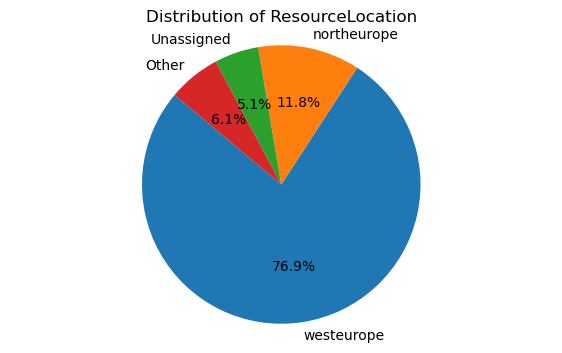

In [16]:
value_counts = data['ResourceLocation'].value_counts()

# Select the top 5 most frequent values and group the rest as "Other"
top_values = value_counts.head(3)
other_count = value_counts[3:].sum()

# Combine the top 6 values and "Other" into a new DataFrame
plot_data = top_values.append(pd.Series({'Other': other_count}))


plt.figure(figsize=(7, 4))
plt.pie(plot_data, labels=plot_data.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title('Distribution of ResourceLocation')
plt.show()

In [17]:
data.describe()

,CostInBillingCurrency
count,93605.000000
mean,0.101932
std,0.465012
min,0.000000
25%,0.000002
50%,0.001696
75%,0.028190
max,26.902857


In [19]:
data[data['CostInBillingCurrency'] == 0]

,Date,MeterCategory,CostInBillingCurrency,MeterSubCategory,MeterName,ConsumedService,ResourceLocation
0,12/31/2022,Azure App Service,0.0,Free Plan,F1 App,microsoft.web,westeurope
10,12/28/2022,Azure App Service,0.0,Free Plan,F1 App,microsoft.web,westeurope
36,12/22/2022,Azure App Service,0.0,Free Plan,F1 App,microsoft.web,westeurope
43,12/29/2022,Storage,0.0,Bandwidth,Geo-Replication Data transfer,Microsoft.Storage,westeurope
108,12/29/2022,Azure App Service,0.0,Free Plan,F1 App,microsoft.web,westeurope
...,...,...,...,...,...,...,...
93575,03/10/2023,Advanced Threat Protection,0.0,Storage,Standard Trial Transactions,microsoft.storage,westeurope
93584,03/18/2023,Advanced Threat Protection,0.0,Storage,Standard Trial Transactions,microsoft.storage,westeurope
93595,03/15/2023,Azure Data Factory v2,0.0,other,Cloud Read Write Operations,MICROSOFT.DATAFACTORY,westeurope
93596,03/14/2023,Azure App Service,0.0,Free Plan,F1 App,microsoft.web,westeurope


In [20]:
# data['Date'] = pd.to_datetime(data['Date'])

# data.set_index('Date', inplace=True)

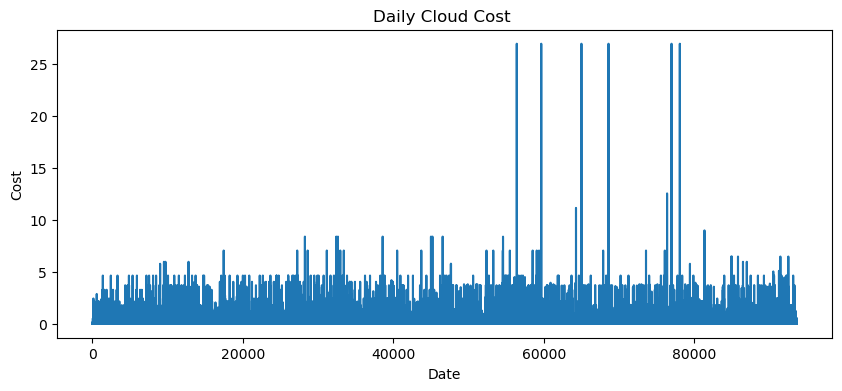

In [21]:
# Plotting the time series
plt.figure(figsize=(10,4))
data['CostInBillingCurrency'].plot()
plt.title('Daily Cloud Cost ')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.show()

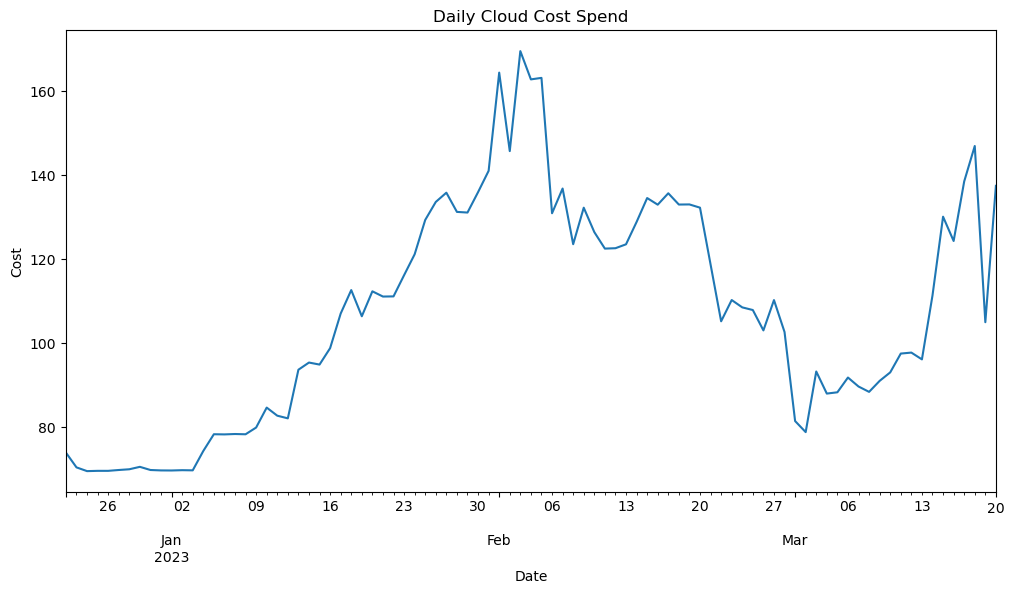

In [22]:
data['Date'] = pd.to_datetime(data['Date'])

# Set 'UsageDateTime' as the DataFrame index for time series analysis
data.set_index('Date', inplace=True)

# Plotting the time series
plt.figure(figsize=(12, 6))
data['CostInBillingCurrency'].resample('D').sum().plot()  # Resampling on daily basis and summing the costs
plt.title('Daily Cloud Cost Spend')
plt.xlabel('Date')
plt.ylabel('Cost')
plt.show()


In [23]:
data['CostInBillingCurrency'].sum()

9541.383680343168

In [24]:
data['CostInBillingCurrency'].resample('M').sum()

Date
2022-12-31     703.068174
2023-01-31    3146.080400
2023-02-28    3622.647685
2023-03-31    2069.587421
Freq: M, Name: CostInBillingCurrency, dtype: float64

In [25]:
daily_costs = data['CostInBillingCurrency'].resample('D').sum()
print(daily_costs)
print(len(daily_costs))

Date
2022-12-22     73.960324
2022-12-23     70.439995
2022-12-24     69.546379
2022-12-25     69.612501
2022-12-26     69.613152
2022-12-27     69.814007
2022-12-28     69.986855
2022-12-29     70.567365
2022-12-30     69.813404
2022-12-31     69.714191
2023-01-01     69.697297
2023-01-02     69.769933
2023-01-03     69.730614
2023-01-04     74.341606
2023-01-05     78.334315
2023-01-06     78.295045
2023-01-07     78.387020
2023-01-08     78.323589
2023-01-09     79.929678
2023-01-10     84.681714
2023-01-11     82.753801
2023-01-12     82.117846
2023-01-13     93.701626
2023-01-14     95.412436
2023-01-15     94.930363
2023-01-16     98.840634
2023-01-17    107.083088
2023-01-18    112.677120
2023-01-19    106.437543
2023-01-20    112.382241
2023-01-21    111.135980
2023-01-22    111.175651
2023-01-23    116.227086
2023-01-24    121.210886
2023-01-25    129.388512
2023-01-26    133.679534
2023-01-27    135.882635
2023-01-28    131.303666
2023-01-29    131.149656
2023-01-30    136.01

In [26]:
data.to_csv('cloud_cost_data', index=True)

In [27]:
daily_costs_df = pd.DataFrame({'DailyCost': daily_costs})

print(daily_costs_df)

             DailyCost
Date                  
2022-12-22   73.960324
2022-12-23   70.439995
2022-12-24   69.546379
2022-12-25   69.612501
2022-12-26   69.613152
2022-12-27   69.814007
2022-12-28   69.986855
2022-12-29   70.567365
2022-12-30   69.813404
2022-12-31   69.714191
2023-01-01   69.697297
2023-01-02   69.769933
2023-01-03   69.730614
2023-01-04   74.341606
2023-01-05   78.334315
2023-01-06   78.295045
2023-01-07   78.387020
2023-01-08   78.323589
2023-01-09   79.929678
2023-01-10   84.681714
2023-01-11   82.753801
2023-01-12   82.117846
2023-01-13   93.701626
2023-01-14   95.412436
2023-01-15   94.930363
2023-01-16   98.840634
2023-01-17  107.083088
2023-01-18  112.677120
2023-01-19  106.437543
2023-01-20  112.382241
2023-01-21  111.135980
2023-01-22  111.175651
2023-01-23  116.227086
2023-01-24  121.210886
2023-01-25  129.388512
2023-01-26  133.679534
2023-01-27  135.882635
2023-01-28  131.303666
2023-01-29  131.149656
2023-01-30  136.010451
2023-01-31  141.088836
2023-02-01 